In [15]:
import pandas as pd


In [16]:
batting_df = pd.read_csv("D:/Cricekt Team Selection/batting.csv")
bowling_df = pd.read_csv("D:/Cricekt Team Selection/bowling.csv")
fielding_df = pd.read_csv("D:/Cricekt Team Selection/field.csv")

In [17]:
# Display first few rows
print("batting")
print(batting_df.head(), "\n")

print("bowling")
print(bowling_df.head(), "\n")

print("field")
print(fielding_df.head(), "\n")


batting
   Unnamed: 0                       Player       Span  Mat  Inns  NO   Runs  \
0           0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426   
1           1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   
2           2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   
3           3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   
4           4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   

     HS    Ave     BF     SR  100  50   0  
0  200*  44.83  21367  86.23   49  96  20  
1   169  41.98  18048  78.86   25  93  15  
2   164  42.03  17046  80.39   30  82  20  
3   189  32.36  14725   91.2   28  68  34  
4   144  33.37  16020  78.96   19  77  28   

bowling
   Unnamed: 0                        Player       Span  Mat  Inns  Balls  \
0           0  M Muralitharan (Asia/ICC/SL)  1993-2011  350   341  18811   
1           1             Wasim Akram (PAK)  1984-2003  356   351  18186   
2           2  

In [4]:
# Clean column names
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

batting_df = clean_columns(batting_df)
bowling_df = clean_columns(bowling_df)
fielding_df = clean_columns(fielding_df)

# Drop 'unnamed:_0' columns if present
for df in [batting_df, bowling_df, fielding_df]:
    if 'unnamed:_0' in df.columns:
        df.drop(columns=['unnamed:_0'], inplace=True)

# Merge datasets on 'player' column
merged_df = batting_df.merge(bowling_df, on='player', how='outer') \
                      .merge(fielding_df, on='player', how='outer')

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Display shape and head of final dataset
print("Merged Dataset Shape:", merged_df.shape)
print(merged_df.head())


Merged Dataset Shape: (5127, 35)
                 player     span_x  mat_x  inns_x    no   runs_x    hs  ave_x  \
0  SR Tendulkar (INDIA)  1989-2012  463.0   452.0  41.0  18426.0  200*  44.83   
1  SR Tendulkar (INDIA)  1989-2012  463.0   452.0  41.0  18426.0  200*  44.83   
2  SR Tendulkar (INDIA)  1989-2012  463.0   452.0  41.0  18426.0  200*  44.83   
3  SR Tendulkar (INDIA)  1989-2012  463.0   452.0  41.0  18426.0  200*  44.83   
4  SR Tendulkar (INDIA)  1989-2012  463.0   452.0  41.0  18426.0  200*  44.83   

        bf   sr_x  ...       span    mat   inns    dis     ct   st  ct_wk  \
0  21367.0  86.23  ...  1989-2012  463.0  456.0  140.0  140.0  0.0    0.0   
1  21367.0  86.23  ...  1989-2012  463.0  456.0  140.0  140.0  0.0    0.0   
2  21367.0  86.23  ...  1989-2012  463.0  456.0  140.0  140.0  0.0    0.0   
3  21367.0  86.23  ...  1989-2012  463.0  456.0  140.0  140.0  0.0    0.0   
4  21367.0  86.23  ...  1989-2012  463.0  456.0  140.0  140.0  0.0    0.0   

   ct_fi         

In [5]:
# Drop exact duplicates
merged_df.drop_duplicates(inplace=True)

# Drop string-based performance columns (e.g., 'hs', 'bbi', 'md') which are hard to quantify
columns_to_drop = ['hs', 'bbi', 'md', 'span_x', 'span_y', 'span']

for col in columns_to_drop:
    if col in merged_df.columns:
        merged_df.drop(columns=[col], inplace=True)

# Optional: Drop Player column temporarily (not useful for ML model)
player_names = merged_df['player']  # Save it if you want to use later for display
merged_df.drop(columns=['player'], inplace=True)

# Convert all remaining columns to numeric
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

# Final null cleanup (if any)
merged_df.fillna(0, inplace=True)

# Preview cleaned data
print("Cleaned Dataset Shape:", merged_df.shape)
print(merged_df.head())


Cleaned Dataset Shape: (2577, 28)
     mat_x  inns_x    no   runs_x  ave_x       bf   sr_x   100    50     0  \
0    463.0   452.0  41.0  18426.0  44.83  21367.0  86.23  49.0  96.0  20.0   
52   404.0   380.0  41.0  14234.0  41.98  18048.0  78.86  25.0  93.0  15.0   
104  375.0   365.0  39.0  13704.0  42.03  17046.0  80.39  30.0  82.0  20.0   
156  445.0   433.0  18.0  13430.0  32.36  14725.0  91.20  28.0  68.0  34.0   
208  448.0   418.0  39.0  12650.0  33.37  16020.0  78.96  19.0  77.0  28.0   

     ...    4    5    mat   inns    dis     ct    st  ct_wk  ct_fi    d/i  
0    ...  4.0  2.0  463.0  456.0  140.0  140.0   0.0    0.0  140.0  0.307  
52   ...  0.0  0.0  404.0  397.0  501.0  402.0  99.0  383.0   19.0  1.261  
104  ...  0.0  0.0  375.0  372.0  160.0  160.0   0.0    0.0  160.0  0.430  
156  ...  8.0  4.0  445.0  441.0  123.0  123.0   0.0    0.0  123.0  0.278  
208  ...  0.0  0.0  448.0  443.0  218.0  218.0   0.0    0.0  218.0  0.492  

[5 rows x 28 columns]


In [6]:
# Define thresholds
batting_avg_threshold = 40
wickets_threshold = 100
dismissals_threshold = 100

# Some datasets use 'ave_x' for batting average, 'wkts' for wickets, 'dis' for dismissals
# We check if those columns exist, else use zeros
merged_df['selected'] = (
    (merged_df.get('ave_x', 0) > batting_avg_threshold) |
    (merged_df.get('wkts', 0) > wickets_threshold) |
    (merged_df.get('dis', 0) > dismissals_threshold)
).astype(int)

# Print class balance
print("Selected class distribution:")
print(merged_df['selected'].value_counts())

# Preview the data
print(merged_df[['ave_x', 'wkts', 'dis', 'selected']].head())


Selected class distribution:
selected
0    2273
1     304
Name: count, dtype: int64
     ave_x   wkts    dis  selected
0    44.83  154.0  140.0         1
52   41.98    0.0  501.0         1
104  42.03    3.0  160.0         1
156  32.36  323.0  123.0         1
208  33.37    8.0  218.0         1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Split features (X) and target (y)
X = merged_df.drop(columns=['selected'])
y = merged_df['selected']

# Step 2: Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predictions and Evaluation
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[454   1]
 [  5  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       455
           1       0.98      0.92      0.95        61

    accuracy                           0.99       516
   macro avg       0.99      0.96      0.97       516
weighted avg       0.99      0.99      0.99       516



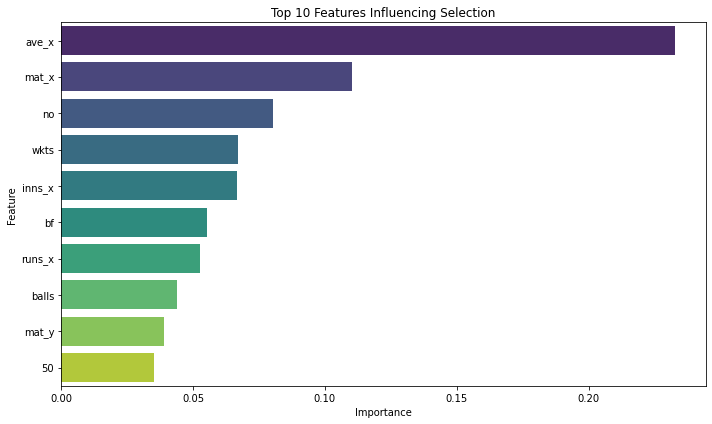

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Features Influencing Selection")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

#  Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define models (LogisticRegression with higher max_iter)
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

#  Step 3: Evaluate models using scaled data
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    
    print(f"\n{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))



Logistic Regression - Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       455
           1       0.98      0.82      0.89        61

    accuracy                           0.98       516
   macro avg       0.98      0.91      0.94       516
weighted avg       0.98      0.98      0.98       516


Decision Tree - Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       0.98      1.00      0.99        61

    accuracy                           1.00       516
   macro avg       0.99      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516


Random Forest - Accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       455
           1       0.98      0.93      0.96        61

    accuracy                           0.99       516
   macro avg       0

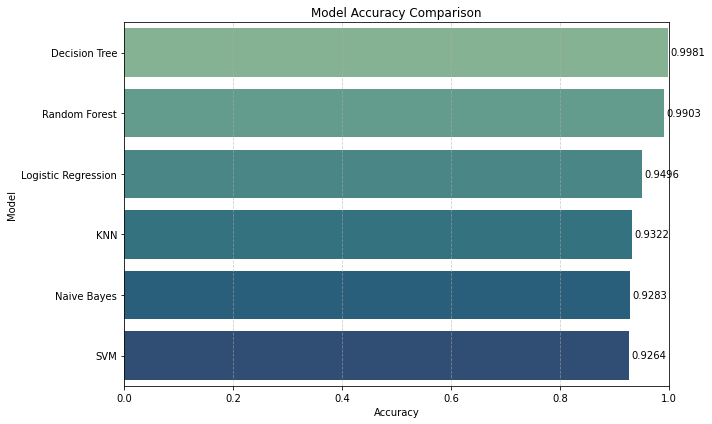

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample accuracy_scores dictionary (replace with your actual values if needed)
accuracy_scores = {
    'Logistic Regression': 0.9496,
    'Decision Tree': 0.9981,
    'Random Forest': 0.9903,
    'SVM': 0.9264,
    'Naive Bayes': 0.9283,
    'KNN': 0.9322
}

# Sort accuracy scores in descending order
sorted_acc = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Create DataFrame
acc_df = pd.DataFrame(list(sorted_acc.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=acc_df, x='Accuracy', y='Model', palette='crest')

# Add value labels to each bar
for index, value in enumerate(acc_df['Accuracy']):
    plt.text(value + 0.005, index, f"{value:.4f}", va='center')

plt.title("Model Accuracy Comparison") 
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [24]:
import joblib

# Step 1: Select best model based on accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print(f"✅ Best Model Selected: {best_model_name}")

# Step 2: Save the best model to a file
joblib.dump(best_model, "best_cricket_model.pkl")
print("✅ Model saved as 'best_cricket_model.pkl'")


✅ Best Model Selected: Decision Tree
✅ Model saved as 'best_cricket_model.pkl'


In [41]:
# Filter only selected players
selected_only = predicted_team_cleaned[predicted_team_cleaned['Selected'] == 'Yes'].copy()

# Create a custom performance score (example formula — feel free to change)
selected_only['PerformanceScore'] = (
    0.3 * selected_only['Runs'] +
    0.2 * selected_only['Bat Avg'] +
    0.2 * selected_only['Strike Rate'] +
    0.2 * selected_only['Wickets'] -
    0.1 * selected_only['Economy']  # Lower economy is better, so subtract
)

# Sort by performance score
selected_only_sorted = selected_only.sort_values(by='PerformanceScore', ascending=False)

# Select top 11 players
final_team = selected_only_sorted.head(11)

# Display final team
print("Final Playing 11 (Based on Model Prediction & Performance):")
print(final_team)


Final Playing 11 (Based on Model Prediction & Performance):
         Runs  Bat Avg  Strike Rate  Wickets  Economy  Dismissals Selected  \
104   13704.0    42.03        80.39      3.0     4.16       160.0      Yes   
208   12650.0    33.37        78.96      8.0     5.69       218.0      Yes   
521   10480.0    37.83        87.19    167.0     4.78       124.0      Yes   
1054   7534.0    34.55        81.90    158.0     4.66         0.0      Yes   
1169   6721.0    47.00        90.20    118.0     4.49         0.0      Yes   
1117   6786.0    35.34        74.59      0.0     4.60       173.0      Yes   
1171   6614.0    32.90        76.61    139.0     4.18         0.0      Yes   
1227   6293.0    35.55        76.22      9.0     6.15       154.0      Yes   
1391   5812.0    42.73        83.33    115.0     4.61         0.0      Yes   
1451   5507.0    47.47        88.60      2.0     5.90         0.0      Yes   
1522   4686.0    28.57        84.76      0.0     0.00       425.0      Yes   

   

In [42]:
# Step 1: Add role info if not already done
def assign_role(row):
    if row['Wickets'] >= 100 and row['Runs'] >= 3000:
        return 'All-Rounder'
    elif row['Wickets'] >= 100:
        return 'Bowler'
    elif row['Runs'] >= 3000:
        return 'Batter'
    else:
        return 'Unknown'

selected_only['Role'] = selected_only.apply(assign_role, axis=1)

# Step 2: Sort by performance
selected_sorted = selected_only.sort_values(by='PerformanceScore', ascending=False)

# Step 3: Select balanced team
batters = selected_sorted[selected_sorted['Role'] == 'Batter'].head(4)
allrounders = selected_sorted[selected_sorted['Role'] == 'All-Rounder'].head(3)
bowlers = selected_sorted[selected_sorted['Role'] == 'Bowler'].head(4)

# Step 4: Combine all
balanced_team = pd.concat([batters, allrounders, bowlers])

# Step 5: Reset index and show result
balanced_team = balanced_team.reset_index(drop=True)
print(" Balanced Playing 11:")
print(balanced_team[['Runs', 'Bat Avg', 'Strike Rate', 'Wickets', 'Economy', 'Role', 'PerformanceScore']])


 Balanced Playing 11:
       Runs  Bat Avg  Strike Rate  Wickets  Economy         Role  \
0   13704.0    42.03        80.39      3.0     4.16       Batter   
1   12650.0    33.37        78.96      8.0     5.69       Batter   
2    6786.0    35.34        74.59      0.0     4.60       Batter   
3    6293.0    35.55        76.22      9.0     6.15       Batter   
4   10480.0    37.83        87.19    167.0     4.78  All-Rounder   
5    7534.0    34.55        81.90    158.0     4.66  All-Rounder   
6    6721.0    47.00        90.20    118.0     4.49  All-Rounder   
7    2434.0    24.09        86.61    173.0     4.38       Bowler   
8    2025.0    13.68        72.42    400.0     4.18       Bowler   
9    1786.0    13.84        87.67    266.0     4.87       Bowler   
10   1858.0    24.12        60.26    157.0     4.27       Bowler   

    PerformanceScore  
0           4135.868  
1           3818.497  
2           2057.326  
3           1911.439  
4           3201.926  
5           2314.624  


In [43]:
balanced_team.to_csv("balanced_playing_11.csv", index=False)
print(" Saved as 'balanced_playing_11.csv'")


 Saved as 'balanced_playing_11.csv'


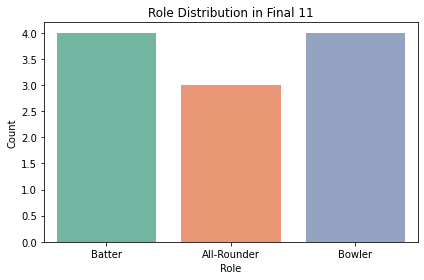

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_team, x='Role', palette='Set2')
plt.title("Role Distribution in Final 11")
plt.xlabel("Role")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
